In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(vcov)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [3]:
airbnb<-read.csv('Data/airbnb.csv',sep = ',', stringsAsFactors = F)

Mostrar las primeras 6 filas del dataframe

In [4]:
head(airbnb, 6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

colnames(airbnb) <- newnames
head(airbnb, 1)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrados

In [6]:
airbnb <- data.frame(airbnb, MetrosCuadrados = (airbnb$PiesCuadrados*0.092903))
head(airbnb, 1)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dentro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 junto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [7]:
print(paste0("airbnb tiene ",count(airbnb), " rows"))

[1] "airbnb tiene 13207 rows"


In [8]:
#ccpp <- distinct(airbnb, CodigoPostal)
distinct(airbnb, CodigoPostal)$CodigoPostal

[1] "28004"        "28015"        "28013"        "28005"        "28012"       
 [6] "28014"        "28045"        "27013"        ""             "28007"       
[11] "28028"        "28009"        "28001"        "28006"        "28010"       
[16] "28002"        "28034"        "28050"        "28008"        "28011"       
[21] "28049"        "28038"        "28053"        "28047"        "28025"       
[26] "28019"        "28024"        "28016"        "28036"        "28046"       
[31] "28039"        "28020"        "28003"        "28029"        "28054"       
[36] "28041"        "28026"        "28058"        "28018"        "28030"       
[41] "28017"        "28027"        "28043"        "28033"        "28055"       
[46] "28021"        "28032"        "28037"        "28022"        "28042"       
[51] "28094"        "280013"       "28002\n28002" "28035"        "28040"       
[56] "28031"        "28044"        "28105"        "28023"        "2805"        
[61] "28051"        "Madrid 28004" "20126"        "28051\n28051" "28850"       
[66] "28048"        "28056"        "20013"        "27004"        "28060"       
[71] "-"            "28"           "2815"         "25008"        "2015"        
[76] "28052"        "2804"

In [9]:
airbnb$CodigoPostal[(airbnb$CodigoPostal=='' )
                    | (airbnb$CodigoPostal=='-')
                    | (airbnb$CodigoPostal=='28')
                    | (substring(airbnb$CodigoPostal,1,2)!='28')] <- NA

airbnb <- filter(airbnb, !is.na(airbnb$CodigoPostal))

airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051'] <- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013'] <- '28013'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <- '28015'

## <font color='red'>**Comentarios**</font>

Un pequeño truco, también puedes usar la siguiente linea para escribir menos:

`airbnb$CodigoPostal[airbnb$CodigoPostal %in% c('','-','28')]<-NA`

Para fijar a NA los codigos postales que no empiezan por 28 puedes usar expresiones regulares:

`airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA`


In [10]:
print(paste0("airbnb filtrado tiene ", count(airbnb), " rows"))

[1] "airbnb filtrado tiene 12759 rows"


Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [11]:
sort(distinct(airbnb, CodigoPostal)$CodigoPostal)

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:
#Los 5 códigos postales con más entradas son
print(head(sort(table(airbnb$CodigoPostal),decreasing = TRUE),5))


28012 28004 28005 28013 28014 
 2060  1795  1195  1020   630 


In [13]:
#Los 5 códigos postales con menos entradas son
print(head(sort(table(airbnb$CodigoPostal),decreasing = FALSE),5))


28048 28052 28056 28058 28060 
    1     1     1     1     1 


¿Cuales son los barrios que hay en el código postal 28012?

In [14]:
distinct(filter(airbnb, airbnb$CodigoPostal == "28012"), Barrio)

Barrio
<chr>
Sol
Acacias
Palos de Moguer
Embajadores
Cortes
Palacio
Universidad
Delicias
Arapiles


¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [15]:
count(group_by(filter(airbnb, airbnb$CodigoPostal == "28012"), Barrio))

Barrio,n
<chr>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [16]:
print(count(distinct(airbnb, Barrio)))
print(distinct(airbnb, Barrio))

    n
1 125
                          Barrio
1                    Universidad
2                            Sol
3                       Imperial
4                        Acacias
5                        Chopera
6                       Delicias
7                Palos de Moguer
8                    Embajadores
9                         Cortes
10                        Atocha
11                      Pacífico
12                       Adelfas
13                      Estrella
14                         Ibiza
15                     Jerónimos
16                    Niño Jesús
17                       Palacio
18                      Justicia
19                     Recoletos
20                          Goya
21              Fuente del Berro
22                      Arapiles
23                     Trafalgar
24                       Almagro
25                    Guindalera
26                         Lista
27                    Castellana
28                       El Viso
29                   Prosperida

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [17]:
head(sort(table(airbnb$Barrio),decreasing = TRUE),5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1800        1326        1055         908         764 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [18]:
print(count(distinct(airbnb,TipoAlquiler)))

  n
1 3


In [19]:
print(distinct(airbnb,TipoAlquiler))

     TipoAlquiler
1    Private room
2 Entire home/apt
3     Shared room


In [20]:
print(count(group_by(airbnb, TipoAlquiler)))

# A tibble: 3 x 2
# Groups:   TipoAlquiler [3]
  TipoAlquiler        n
  <chr>           <int>
1 Entire home/apt  7682
2 Private room     4897
3 Shared room       180


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”


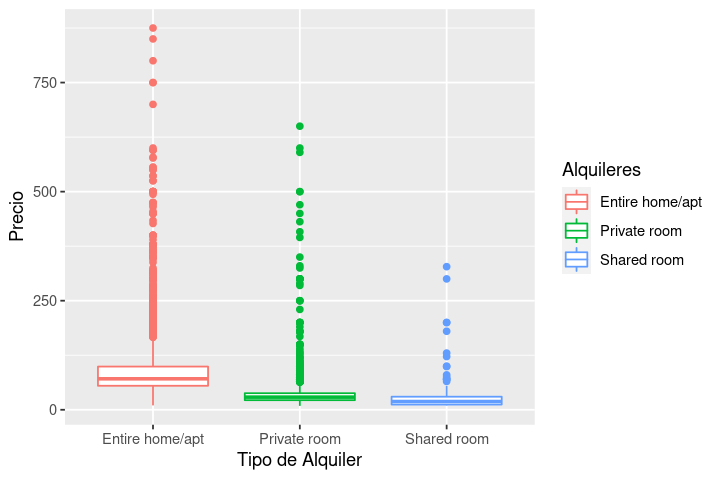

In [21]:
ggplot(data=airbnb,aes(x=TipoAlquiler, 
                       y=Precio,
                       color=TipoAlquiler
                      )
      ) + geom_boxplot() +
          scale_color_discrete(name="Alquileres") + 
          ylab("Precio") + 
          xlab("Tipo de Alquiler")

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [22]:
precios_sin_Na <- filter(airbnb, !is.na(airbnb$Precio))

Entire_home_mean <- mean(precios_sin_Na$Precio[precios_sin_Na$TipoAlquiler=='Entire home/apt'])
Private_room_mean <- mean(precios_sin_Na$Precio[precios_sin_Na$TipoAlquiler=='Private room'])
Shared_room_mean <- mean(precios_sin_Na$Precio[precios_sin_Na$TipoAlquiler=='Shared room'])

print(paste0("Media en Entire home/apt : ", Entire_home_mean))
print(paste0("Media en Private room : ", Private_room_mean))
print(paste0("Media en Shared room : ", Shared_room_mean))
print("Hay mucha diferencia con el Tipo de alquiler (Entire home/apt).")
print("Creo que si que es estadísticamente significativa")

[1] "Media en Entire home/apt : 87.1727462219906"
[1] "Media en Private room : 34.0377936670072"
[1] "Media en Shared room : 30.1833333333333"
[1] "Hay mucha diferencia con el Tipo de alquiler (Entire home/apt)."
[1] "Creo que si que es estadísticamente significativa"


In [23]:
#test de Shapiro, ya que se considera uno de los tests más fiables
shapiro.test(rnorm(100, mean=Entire_home_mean, sd=4))
shapiro.test(rnorm(100, mean=Private_room_mean, sd=4))
shapiro.test(rnorm(100, mean=Shared_room_mean, sd=4))


	Shapiro-Wilk normality test

data:  rnorm(100, mean = Entire_home_mean, sd = 4)
W = 0.98867, p-value = 0.5592



	Shapiro-Wilk normality test

data:  rnorm(100, mean = Private_room_mean, sd = 4)
W = 0.99308, p-value = 0.8926



	Shapiro-Wilk normality test

data:  rnorm(100, mean = Shared_room_mean, sd = 4)
W = 0.97885, p-value = 0.1081


Como el p-value de 'Shared_room_mean' sale muy pequeño se rechaza la hipótesis nula, es decir, los datos no están en una distribución normal

## <font color='red'>**Comentarios**</font>

Es justo al revés:

*Como el p-value de 'Shared_room_mean' sale muy GRANDE (>0.05) se rechaza la hipótesis nula, es decir, los datos no están en una distribución normal*



Para responder la pregunta de si los valores son estadísticamente independientes había que haber hecho un test tipo ANOVA.

Pero hay que tener cuidado porque el test ANOVA es óptimo cuando la distribución de valores dentro de cada grupo sigue una distribución gaussiana. En caso contrario se podría usar un test como el de kruskal. 

Para comprobar si una variable sigue una distribución gaussiana podemos aplicar el test de shapiro. En ese caso veríamos que ningún grupo seguiría una distribución gaussiana. Por lo tanto tendríamos que aplicar un test de kruskal, el cual nos daría un pvalor muy bajo indicando que los grupos tienen medias diferentes.


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [24]:
airbnb_entire <- filter(precios_sin_Na, 
                        precios_sin_Na$TipoAlquiler=='Entire home/apt')
head(airbnb_entire,2)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
2,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [25]:
apartment <- filter(airbnb_entire, airbnb_entire$TipoPropiedad=='Apartment')
apartment_count <- count(group_by(apartment,Barrio))
colnames(apartment_count) <- c('Barrio', 'Frecuencia')
head(apartment_count[order(apartment_count$Frecuencia,decreasing = TRUE),],5)

Barrio,Frecuencia
<chr>,<int>
Embajadores,1077
Universidad,877
Palacio,672
Sol,636
Cortes,522


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [26]:
barrios_precio_medio <- aggregate(Precio ~ Barrio, 
                                  FUN = mean, 
                                  data = airbnb_entire)
barrios_precio_medio <- barrios_precio_medio[order(barrios_precio_medio$Precio,
                                                   decreasing = TRUE),]
head(barrios_precio_medio,5)

,Barrio,Precio
,<chr>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
92,Recoletos,158.8968
43,El Plantío,150.0000
27,Casco Histórico de Barajas,141.2500


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [27]:
apartamentos_por_barrio <- merge(apartment_count,
                                 barrios_precio_medio,
                                 all.y = TRUE)
apartamentos_por_barrio <- apartamentos_por_barrio[order(apartamentos_por_barrio$Precio,
                                                         decreasing = TRUE),]
head(apartamentos_por_barrio,5)

,Barrio,Frecuencia,Precio
,<chr>,<int>,<dbl>
77,Palomas,2,309.7500
50,Fuentelareina,1,180.0000
92,Recoletos,115,158.8968
43,El Plantío,NA,150.0000
27,Casco Histórico de Barajas,6,141.2500


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [28]:
barrios_frecuencia <- filter(apartamentos_por_barrio, 
                             apartamentos_por_barrio$Frecuencia > 100)
head(barrios_frecuencia,5)

,Barrio,Frecuencia,Precio
,<chr>,<int>,<dbl>
1,Recoletos,115,158.89683
2,Goya,119,109.98540
3,Sol,636,100.59593
4,Justicia,473,99.04624
5,Trafalgar,198,98.86977


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

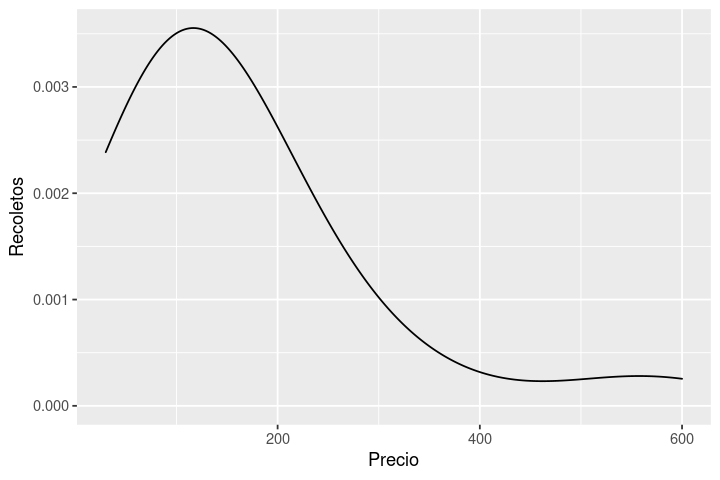

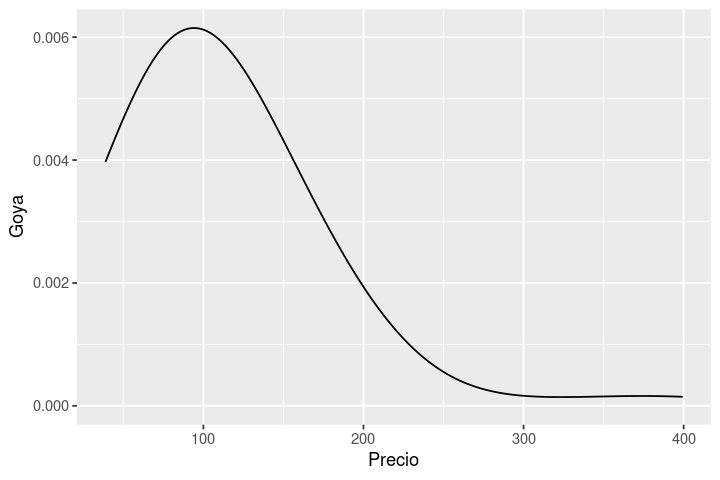

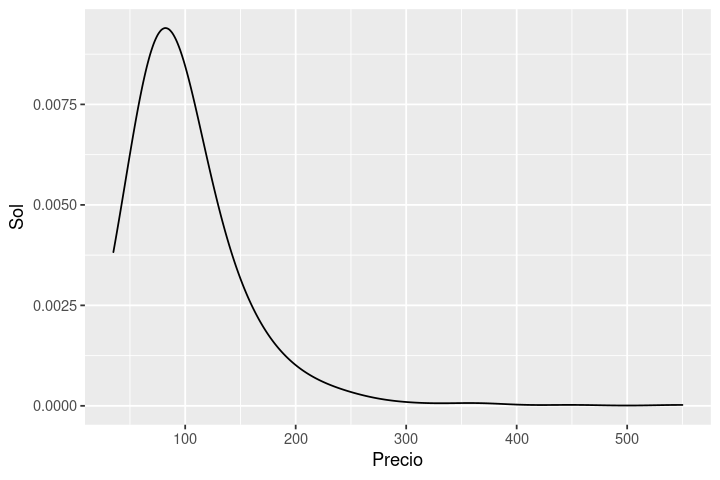

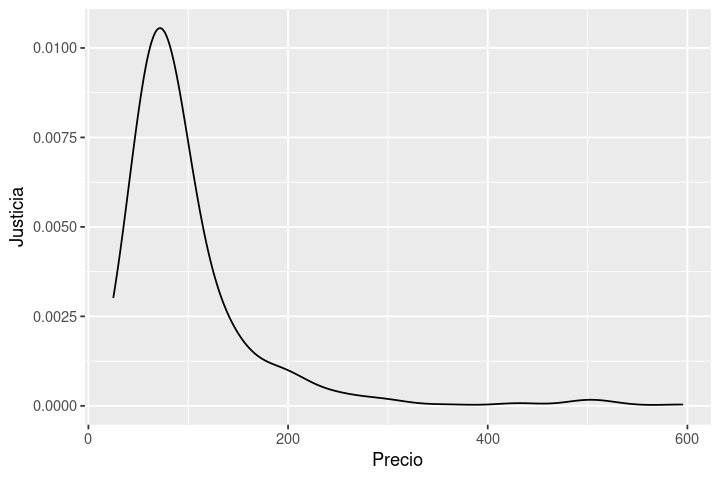

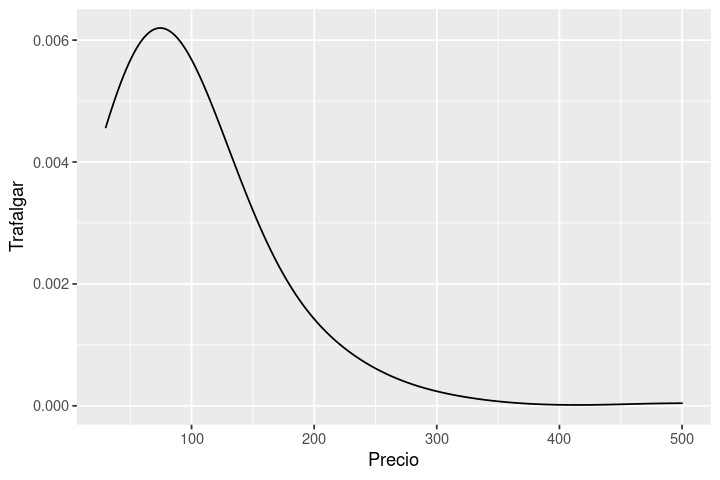

In [29]:
barrios = c('Recoletos', 'Goya', 'Sol', 'Justicia', 'Trafalgar')
for (bar in barrios){
        df <- filter(apartment, apartment$Barrio==bar)
        print(ggplot(data=df, 
                     aes(Precio)) + 
              geom_density(adjust = 3) + 
              ylab(bar))        
     }

## <font color='red'>**Comentarios**</font>

Correcto, aunque también podías haberlo pintado todo en el mismo gráfico. Las líneas anteriores se podrían haber simplicado en dos líneas:

```
top_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density(bw=10)
```

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [30]:
barrios_medio <- aggregate(MetrosCuadrados ~ Barrio,
                           FUN = mean, data = apartment, 
                           na.rm = TRUE)
barrios_medio <- merge(head(barrios_frecuencia,5),
                       barrios_medio,
                       by="Barrio")
barrios_medio

Barrio,Frecuencia,Precio,MetrosCuadrados
<chr>,<int>,<dbl>,<dbl>
Goya,119,109.98540,51.68504
Justicia,473,99.04624,30.30960
Recoletos,115,158.89683,26.66316
Sol,636,100.59593,43.42527
Trafalgar,198,98.86977,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

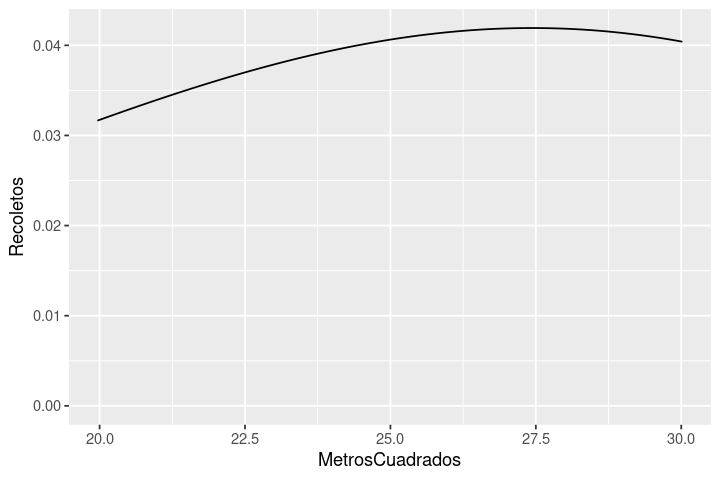

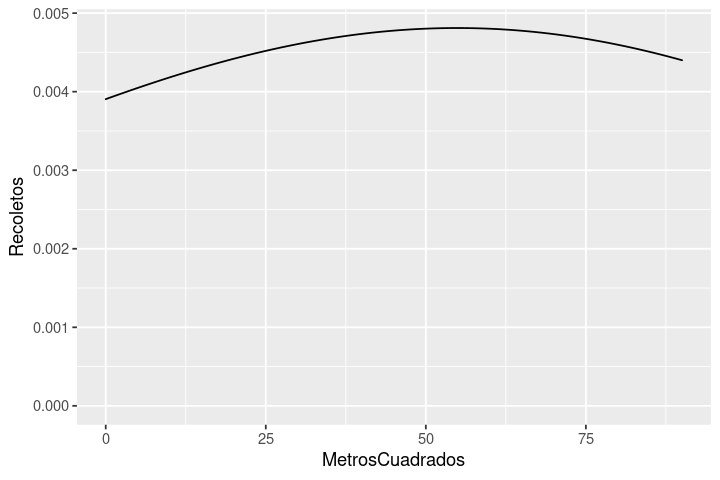

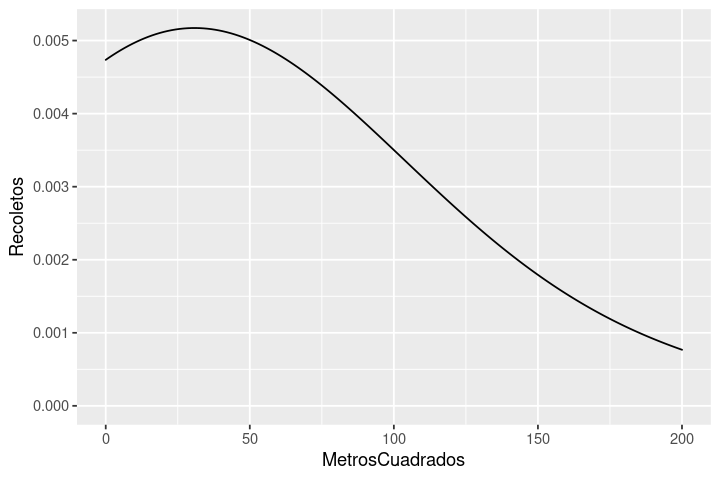

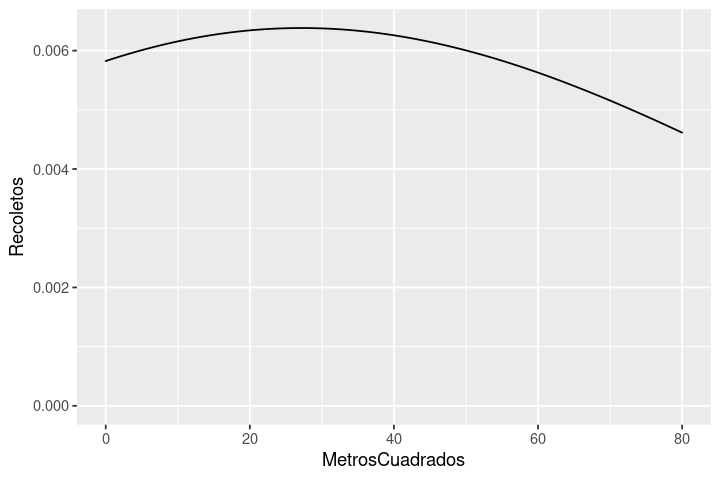

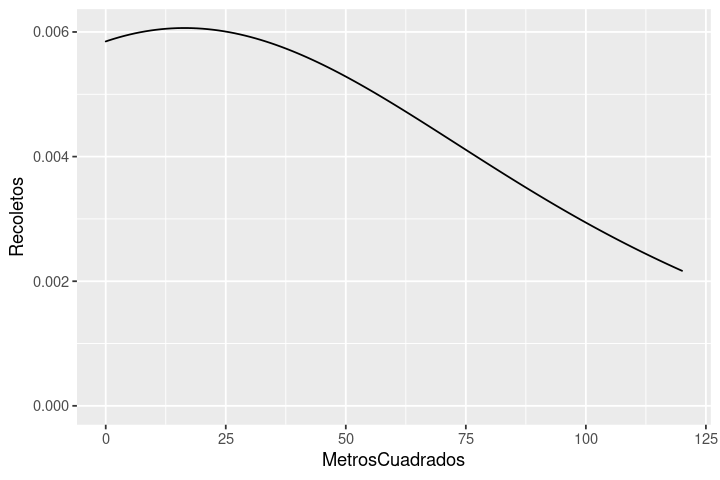

In [31]:
for (bar in barrios){
        df <- filter(apartment, 
                     apartment$Barrio==bar,
                     !is.na(apartment$MetrosCuadrados)
                    )
        print(ggplot(data=df, 
                     aes(MetrosCuadrados)
                    ) + 
              geom_density(adjust = 3) + 
              ylab('Recoletos')
             )        
     }

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [32]:
#El Test de Tukey
TukeyHSD(aov(Precio ~ Barrio, data=barrios_medio))

Warning message in qtukey(conf.level, length(means), x$df.residual):
“NaNs produced”


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Precio ~ Barrio, data = barrios_medio)

$Barrio
                           diff lwr upr p adj
Justicia-Goya       -10.9391587 NaN NaN   NaN
Recoletos-Goya       48.9114239 NaN NaN   NaN
Sol-Goya             -9.3894712 NaN NaN   NaN
Trafalgar-Goya      -11.1156340 NaN NaN   NaN
Recoletos-Justicia   59.8505826 NaN NaN   NaN
Sol-Justicia          1.5496875 NaN NaN   NaN
Trafalgar-Justicia   -0.1764753 NaN NaN   NaN
Sol-Recoletos       -58.3008952 NaN NaN   NaN
Trafalgar-Recoletos -60.0270580 NaN NaN   NaN
Trafalgar-Sol        -1.7261628 NaN NaN   NaN


## <font color='red'>**Comentarios**</font>

Este caso es igual que el anterior. El test de Tukey solo deberías usarlo cuando sepas que los datos siguen una ditribución normal.

Para responder la pregunta de si los valores son estadísticamente independientes había que haber hecho un test tipo ANOVA.

Pero hay que tener cuidado porque el test ANOVA es óptimo cuando la distribución de valores dentro de cada grupo sigue una distribución gaussiana. En caso contrario se podría usar un test como el de kruskal. 

Para comprobar si una variable sigue una distribución gaussiana podemos aplicar el test de shapiro. En ese caso veríamos que ningún grupo seguiría una distribución gaussiana. Por lo tanto tendríamos que aplicar un test de kruskal, el cual nos daría un pvalor muy bajo indicando que los grupos tienen medias diferentes.



Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [33]:
barrio_sol <- subset(airbnb_entire,Barrio == "Sol")

lineal <- lm(data=barrio_sol,
             formula=NumBanyos~MaxOcupantes
            )
summary(lineal)


Call:
lm(formula = NumBanyos ~ MaxOcupantes, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2177 -0.1607 -0.1607  0.1821  2.7823 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.475069   0.038295   12.40   <2e-16 ***
MaxOcupantes 0.171414   0.007548   22.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4066 on 686 degrees of freedom
Multiple R-squared:  0.4292,	Adjusted R-squared:  0.4284 
F-statistic: 515.8 on 1 and 686 DF,  p-value: < 2.2e-16


Calculamos la correlación.

In [34]:
cor(barrio_sol[,c("NumBanyos","NumDormitorios","MaxOcupantes", "MetrosCuadrados")],
    use = "complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6819063,0.6802388,0.4525919
NumDormitorios,0.6819063,1.0000000,0.7788753,0.5549008
MaxOcupantes,0.6802388,0.7788753,1.0000000,0.4027592
MetrosCuadrados,0.4525919,0.5549008,0.4027592,1.0000000


## <font color='red'>**Comentarios**</font>

En este caso es ligeramente mejor usar `pairwise.complete.obs` que `complete.obs`.
La última lo que hace es equivalente a un `na.omit()` elimina todas las filas con al menos un NA y luego calcula la correlación. La opción `pairwise.complete.obs` en cambio va pareja a pareja de elementos y solo elimina aquellos en los que una pareja hay al menos un NA.


Vemos que la correlación entre el número de dormitorios y los metros cuadrados es muy baja.
Mediante un histograma o curvas de densidad podemos descartar vañores que no tienen sentido.


Warning message:
“Removed 629 rows containing missing values (position_stack).”


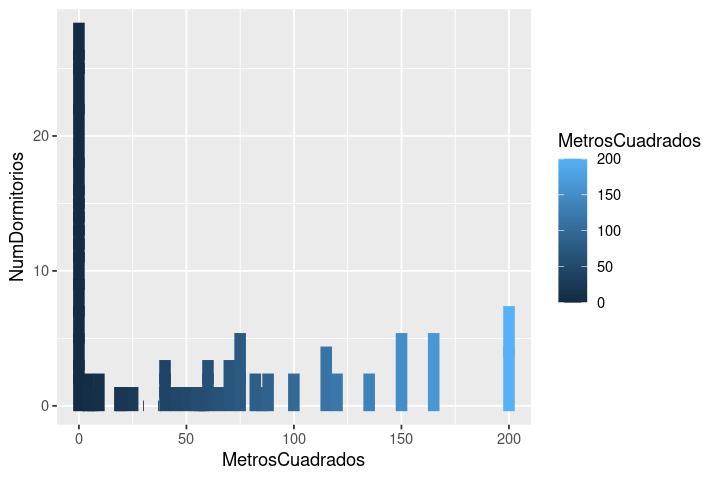

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7220384,0.8482725,0.5695087
NumDormitorios,0.7220384,1.0000000,0.7687103,0.8098261
MaxOcupantes,0.8482725,0.7687103,1.0000000,0.6379055
MetrosCuadrados,0.5695087,0.8098261,0.6379055,1.0000000


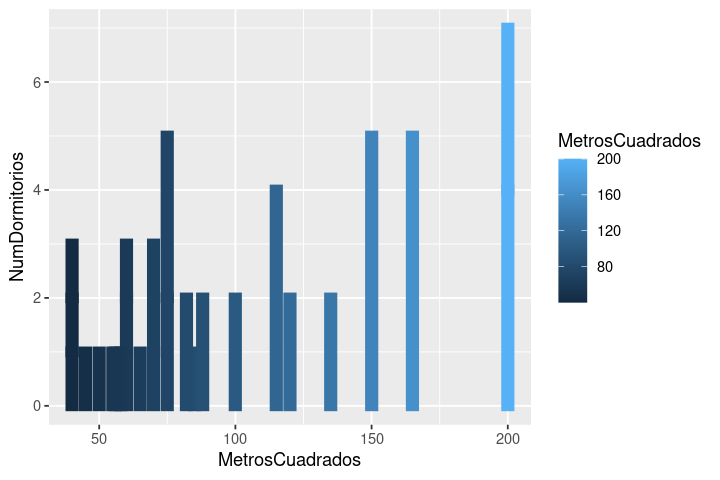

In [35]:
ggplot(barrio_sol,
       aes(x=MetrosCuadrados, 
           y=NumDormitorios, 
           color=MetrosCuadrados)
      ) + geom_col(size=3)

barrio_sol_filter <- filter(barrio_sol, 
                            barrio_sol$MetrosCuadrados > 29, 
                            !is.na(barrio_sol$MetrosCuadrados), 
                            barrio_sol$NumDormitorios > 0
                           )

ggplot(barrio_sol_filter,
       aes(x=MetrosCuadrados, 
                             y=NumDormitorios, 
                             color=MetrosCuadrados)
      ) + geom_col(size=3)

 cor(barrio_sol_filter[,c("NumBanyos",
                          "NumDormitorios",
                          "MaxOcupantes", 
                          "MetrosCuadrados")],
     use = "complete.obs")

Con los datos filtrados calculamos el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [36]:
cov(barrio_sol_filter[,c("NumBanyos",
                         "NumDormitorios",
                         "MaxOcupantes", 
                         "MetrosCuadrados")],
    use = "complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,0.5641026,0.6880342,1.688034,19.86774
NumDormitorios,0.6880342,1.6096866,2.584046,47.72342
MaxOcupantes,1.6880342,2.5840456,7.019943,78.50409
MetrosCuadrados,19.8677433,47.7234241,78.504094,2157.43802


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

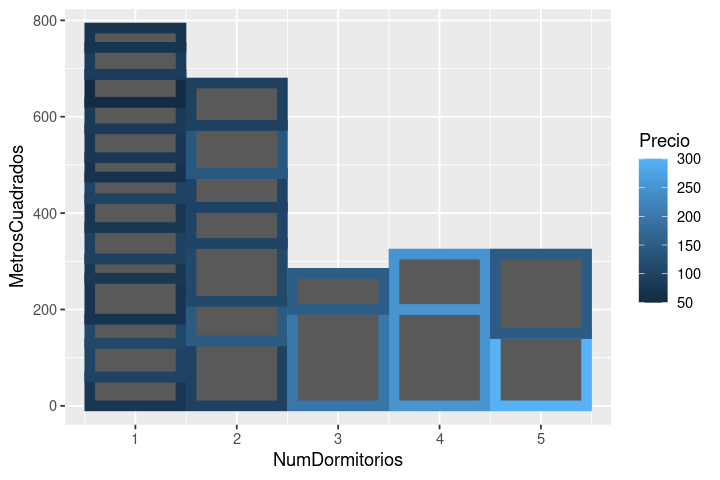

In [37]:
ggplot(barrio_sol_filter,
       aes(y=MetrosCuadrados, 
                             x=NumDormitorios, 
                             color=Precio)
      ) + geom_col(size=3)

Viendo la gráfica observamos que cuantas mas habitaciones mas caro es el inmueble

## <font color='red'>**Comentarios**</font>

Lo que pregunto es que variable es más fiable a la hora de calcular el precio.

Una forma de hacerlo es creando un modelo de regresión lineal tomando como variable dependiente el Precio y como variables independientes el número de habitaciones y los metros cuadrados. Mirando el pvalor de cada uno de los coeficientes verías cual es más significativo. De la misma forma que en clase veiamos que variables afectaban en mayor medida al peso de un niño al nacer en el notebook donde vimos las regresiones lineales.

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [38]:
modelo <- lm(data = barrio_sol_filter, 
             formula= MetrosCuadrados ~ Precio)
modelo


Call:
lm(formula = MetrosCuadrados ~ Precio, data = barrio_sol_filter)

Coefficients:
(Intercept)       Precio  
    20.9337       0.5578  


In [39]:
summary(modelo)


Call:
lm(formula = MetrosCuadrados ~ Precio, data = barrio_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.369 -20.139  -6.757  11.601  68.085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.93373   13.08538   1.600    0.122    
Precio       0.55780    0.09762   5.714 5.95e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.19 on 25 degrees of freedom
Multiple R-squared:  0.5664,	Adjusted R-squared:  0.549 
F-statistic: 32.65 on 1 and 25 DF,  p-value: 5.951e-06


In [40]:
modelo$coefficients[2]

Precio 
0.557797

In [41]:
#intervalo_confianza
confint(object = modelo, 
        parm = "Precio",
        level = 0.95)

,2.5 %,97.5 %
Precio,0.3567526,0.7588414


In [42]:
#prediccion_confianza
head(predict(modelo,
             barrio_sol_filter,
             interval = 'confidence'),5)

,fit,lwr,upr
1,62.76851,47.55339,77.98362
2,76.71343,63.76679,89.66007
3,160.38298,131.30886,189.45711
4,81.17581,68.61225,93.73937
5,75.59784,62.52623,88.66944


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [43]:
modelo2 <- lm(data = barrio_sol_filter,
              formula = NumDormitorios ~ Precio)
modelo2


Call:
lm(formula = NumDormitorios ~ Precio, data = barrio_sol_filter)

Coefficients:
(Intercept)       Precio  
   -0.18110      0.01769  


In [44]:
summary(modelo2)


Call:
lm(formula = NumDormitorios ~ Precio, data = barrio_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7294 -0.3090 -0.1456  0.2659  2.5454 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.181097   0.263996  -0.686    0.499    
Precio       0.017690   0.001969   8.982 2.67e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6293 on 25 degrees of freedom
Multiple R-squared:  0.7634,	Adjusted R-squared:  0.754 
F-statistic: 80.68 on 1 and 25 DF,  p-value: 2.671e-09


In [45]:
modelo2$coefficients[2]

Precio 
0.01768956


## <font color='red'>**Comentarios**</font>

Realmente es más fácil de ver si haces el modelo con la variable dependiente con el Precio. 

Así puedes ver como afecta al precio el número de habitaciones o los metros cuadrados.

Con los modelos que has hecho estas viendo como un cambio de precio hace que un piso tenga más habitaciones o más metros cuadrados.

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [46]:
three_rooms <- filter(barrio_sol_filter,
                      barrio_sol_filter$NumDormitorios == 3)
prob_three_rooms = (count(three_rooms)/count(barrio_sol_filter))$n[1]
prob_three_rooms 

[1] 0.07407407

In [47]:
print(paste("Entre ",
            qnorm(prob_three_rooms/100, lower.tail = T),
            " y ",
            qnorm(prob_three_rooms/100, lower.tail = F)
           )
      )

[1] "Entre  -3.17828675982275  y  3.17828675982275"


## <font color='red'>**Comentarios**</font>

Esto viene explicado al final del notebook 6. Las variable sigue una distribución binomial, deberías usar un binom test.

El intervalo de confianza de una probabilidad tiene que estar por definición entre 0 y 1. Aqui estas mostrando valores muy fuera de ese margen.